In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

In [11]:
df = pd.read_csv('Top Indian Places to Visit.csv')
df

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,320,Western,Gujarat,Gandhinagar,Akshardham,Temple,1992,3.0,4.6,0,Yes,Monday,Religious,No,0.18,All
321,321,Central,Uttar Pradesh,Agra,Agra Fort,Fort,1565,2.0,4.5,40,Yes,NaN,Historical,Yes,1.30,Afternoon
322,322,Central,Madhya Pradesh,Bhopal,Madhya Pradesh Tribal Museum,Museum,2013,2.0,4.7,10,Yes,Monday,Cultural,Yes,0.15,All
323,323,Northern,Rajasthan,Jaipur,City Palace,Palace,1727,2.0,4.4,200,Yes,NaN,Historical,Yes,0.51,Morning


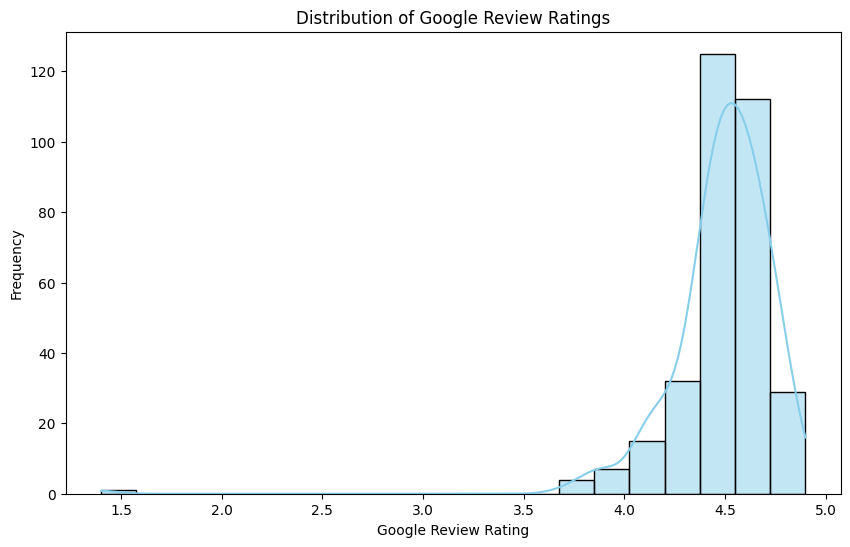

In [12]:
# Distribution of Google review ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Google review rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Google Review Ratings')
plt.xlabel('Google Review Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-13-7264f19cd147>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Zone', y='Google review rating', data=df, palette='Set3')


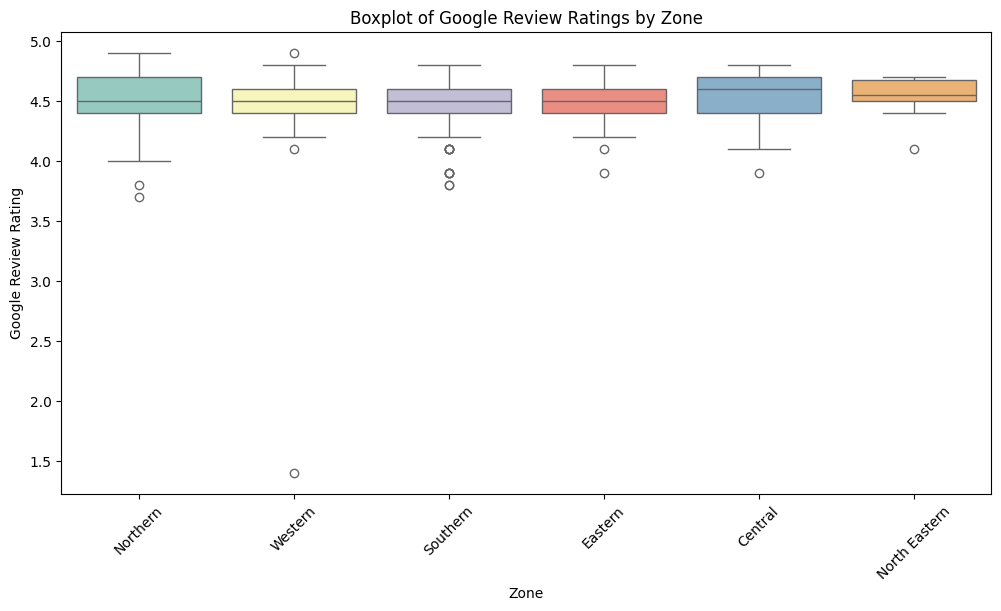

In [13]:
# Boxplot of Google review ratings by Zone
plt.figure(figsize=(12, 6))
sns.boxplot(x='Zone', y='Google review rating', data=df, palette='Set3')
plt.title('Boxplot of Google Review Ratings by Zone')
plt.xlabel('Zone')
plt.ylabel('Google Review Rating')
plt.xticks(rotation=45)
plt.show()

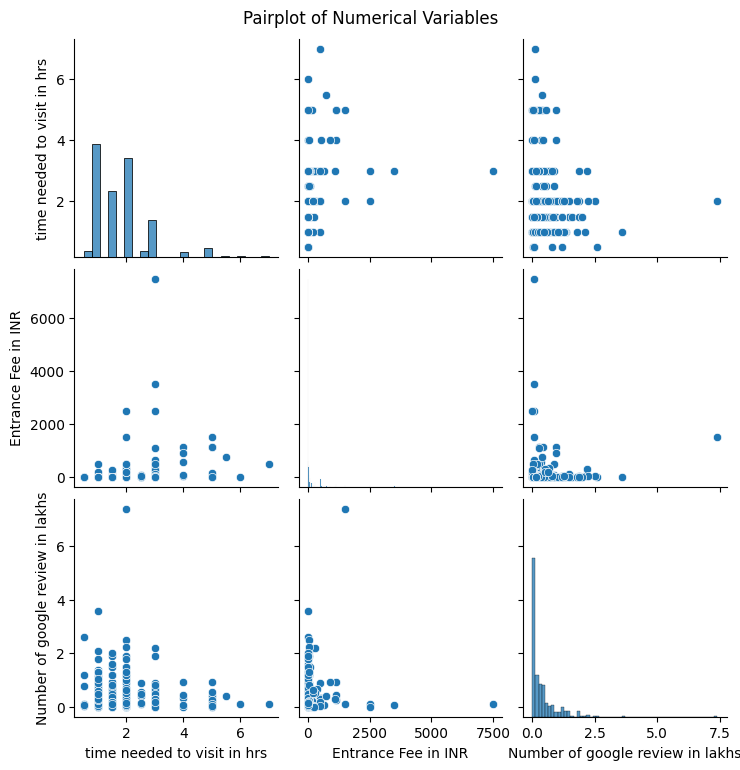

In [14]:
# Pairplot to visualize relationships between numerical variables
numerical_cols = ['time needed to visit in hrs', 'Entrance Fee in INR', 'Number of google review in lakhs']
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

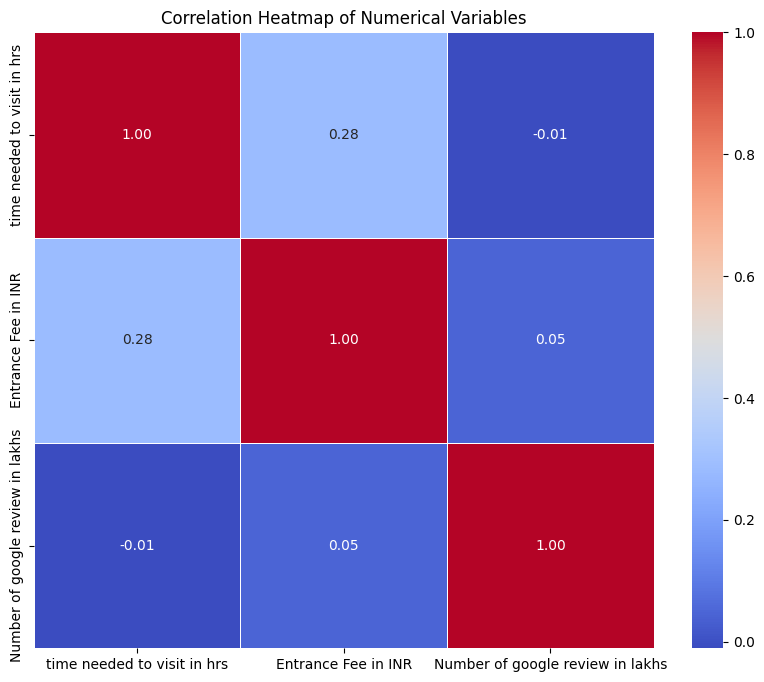

In [15]:
# Correlation heatmap of numerical variables
plt.figure(figsize=(10, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [16]:
# remove all rows which contain NaN value
df.dropna(inplace=True)

In [17]:
df_encoded = pd.get_dummies(df, columns=['Zone', 'State', 'City', 'Name', 'Type', 'Establishment Year',
                                         'Weekly Off', 'Significance', 'Best Time to visit',
                                         'Airport with 50km Radius', 'DSLR Allowed'])

df_encoded.head(5)

,Unnamed: 0,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Number of google review in lakhs,Zone_Central,Zone_Eastern,Zone_North Eastern,Zone_Northern,Zone_Southern,...,Significance_Sports,Significance_Wildlife,Best Time to visit_Afternoon,Best Time to visit_All,Best Time to visit_Evening,Best Time to visit_Morning,Airport with 50km Radius_No,Airport with 50km Radius_Yes,DSLR Allowed_No,DSLR Allowed_Yes
3,3,2.0,4.1,50,0.27,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,True
5,5,3.0,4.2,0,0.25,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,True
6,6,1.0,4.5,0,0.59,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,True
12,12,3.0,4.5,20,0.08,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
13,13,3.0,4.1,80,0.41,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True


In [18]:
# user input for finding prediction
zone = input('Zone: ')
state = input('State: ')
city = input('City: ')
name = input('Name: ')
type_travel = input('Type: ')
establishment_year = input('Establishment Year: ')
time_needed_to_visit_in_hrs = float(input('Time needed to visit (in hrs): '))
entrance_fee = float(input('Entrance Fee (in INR): '))
airport = input('Airport with 50km Radius (Yes or No): ')
weekoff = input('Weekly Off (if not - None): ')
significance = input('Significance: ')
dslr_allowed = input('DSLR Allowed (Yes or No): ')
no_of_google_review_in_lakh = float(input('Number of google review in lakhs (input `1` mean `1 lakh`): '))
best_time_to_visit = input('Best time to visit (ex. Evening, Morning, Afternoon, Night, All): ')

Zone: Eastern
State: West Bengal
City: kolkata
Name: Victoria
Type: Historical
Establishment Year: 1200
Time needed to visit (in hrs): 5
Entrance Fee (in INR): 0
Airport with 50km Radius (Yes or No): Yes
Weekly Off (if not - None): None
Significance: Palace
DSLR Allowed (Yes or No): Yes
Number of google review in lakhs (input `1` mean `1 lakh`): 2
Best time to visit (ex. Evening, Morning, Afternoon, Night, All): Evening


In [19]:
# Example prediction
user_data = {
    'Zone': [zone],
    'State': [state],
    'City': [city],
    'Name': [name],
    'Type': [type_travel],
    'Establishment Year': [establishment_year],
    'time needed to visit in hrs': [time_needed_to_visit_in_hrs],
    'Entrance Fee in INR': [entrance_fee],
    'Airport with 50km Radius': [airport],
    'Weekly Off': [weekoff],
    'Significance': [significance],
    'DSLR Allowed': [dslr_allowed],
    'Number of google review in lakhs': [no_of_google_review_in_lakh],  # Assuming it has 1.1 lakh reviews
    'Best Time to visit': [best_time_to_visit]
}

user_data

{'Zone': ['Eastern'],
 'State': ['West Bengal'],
 'City': ['kolkata'],
 'Name': ['Victoria'],
 'Type': ['Historical'],
 'Establishment Year': ['1200'],
 'time needed to visit in hrs': [5.0],
 'Entrance Fee in INR': [0.0],
 'Airport with 50km Radius': ['Yes'],
 'Weekly Off': ['None'],
 'Significance': ['Palace'],
 'DSLR Allowed': ['Yes'],
 'Number of google review in lakhs': [2.0],
 'Best Time to visit': ['Evening']}

In [20]:
# Example prediction
example_data = {
    'Zone': ['Northern'],
    'State': ['Delhi'],
    'City': ['New Delhi'],
    'Name': ['India Gate'],
    'Type': ['War Memorial'],
    'Establishment Year': ['1931'],
    'time needed to visit in hrs': [2],
    'Entrance Fee in INR': [0],  # Assuming it's free
    'Airport with 50km Radius': ['Yes'],
    'Weekly Off': ['None'],
    'Significance': ['Historical'],
    'DSLR Allowed': ['Yes'],
    'Number of google review in lakhs': [1.1],  # Assuming it has 1.1 lakh reviews
    'Best Time to visit': ['Evening']
}

In [21]:
user_df = pd.DataFrame(user_data)
user_df

,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,Eastern,West Bengal,kolkata,Victoria,Historical,1200,5.0,0.0,Yes,None,Palace,Yes,2.0,Evening


In [22]:
# Splitting the data into train and test sets
X = df_encoded.drop(['Unnamed: 0','Google review rating'], axis=1)
y = df_encoded['Google review rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train

,time needed to visit in hrs,Entrance Fee in INR,Number of google review in lakhs,Zone_Central,Zone_Eastern,Zone_North Eastern,Zone_Northern,Zone_Southern,Zone_Western,State_Andaman and Nicobar Islands,...,Significance_Sports,Significance_Wildlife,Best Time to visit_Afternoon,Best Time to visit_All,Best Time to visit_Evening,Best Time to visit_Morning,Airport with 50km Radius_No,Airport with 50km Radius_Yes,DSLR Allowed_No,DSLR Allowed_Yes
290,1.5,30,0.12,False,False,False,False,True,False,True,...,False,False,True,False,False,False,False,True,False,True
73,3.0,350,0.67,False,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,True
3,2.0,50,0.27,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,True
13,3.0,80,0.41,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,True
131,1.5,25,0.27,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,True
19,3.0,50,0.60,False,False,False,False,False,True,False,...,False,True,False,True,False,False,False,True,False,True
78,7.0,500,0.11,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True
70,2.0,200,0.17,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,True
263,2.0,20,0.25,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,True,False,True
5,3.0,0,0.25,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [24]:
X_test

,time needed to visit in hrs,Entrance Fee in INR,Number of google review in lakhs,Zone_Central,Zone_Eastern,Zone_North Eastern,Zone_Northern,Zone_Southern,Zone_Western,State_Andaman and Nicobar Islands,...,Significance_Sports,Significance_Wildlife,Best Time to visit_Afternoon,Best Time to visit_All,Best Time to visit_Evening,Best Time to visit_Morning,Airport with 50km Radius_No,Airport with 50km Radius_Yes,DSLR Allowed_No,DSLR Allowed_Yes
318,2.0,50,0.240,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
124,3.0,30,0.210,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,True
282,1.5,10,0.035,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
135,3.0,30,0.490,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,True
32,1.0,25,2.100,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
42,1.5,30,0.730,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
320,3.0,0,0.180,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,True,False


In [26]:
y_train

,Google review rating
290,4.7
73,4.6
3,4.1
13,4.1
131,4.4
19,4.3
78,4.4
70,4.4
263,4.1
5,4.2


In [27]:
y_test

,Google review rating
318,4.4
124,4.6
282,4.5
135,4.7
32,4.5
42,4.6
320,4.6


In [29]:
# Machine Learning Regression Model - Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predicting on test set
y_pred = model.predict(X_test)

In [31]:
print(len(y_pred))

7


In [32]:
y_pred

array([4.52241218, 4.40734644, 4.5739958 , 4.62103419, 4.86677035,
       4.75152727, 4.52225633])

In [33]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Squared Error %:", mse*100)

Mean Squared Error: 0.03247659875482853
Mean Squared Error %: 3.247659875482853


In [34]:
user_df_encoded = pd.get_dummies(user_df, columns=['Zone', 'State', 'City', 'Name', 'Type',
                                                         'Establishment Year', 'Weekly Off',
                                                         'Significance', 'Best Time to visit',
                                                         'Airport with 50km Radius', 'DSLR Allowed'])

In [35]:
# Ensure that the columns in the example data match the columns used during model training
# If there are missing columns, add them and fill with zeros
missing_cols = list(set(X_train.columns) - set(user_df_encoded.columns))
if missing_cols:
    user_df_encoded = pd.concat([user_df_encoded, pd.DataFrame(0, index=user_df_encoded.index, columns=missing_cols)], axis=1)


In [36]:
# Ensure the order of columns is the same as in the training data
user_df_encoded = user_df_encoded.reindex(columns=X_train.columns, fill_value=0)

In [37]:
# Predict the Google Review Rating
predicted_rating = model.predict(user_df_encoded)
print("Predicted Google Review Rating:", predicted_rating[0])

Predicted Google Review Rating: 4.555226686231576


In [39]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [40]:
y_pred_svr = svr_model.predict(X_test)

In [41]:
print(len(y_pred_svr))

7


In [42]:
y_pred_svr

array([4.49027335, 4.33034819, 4.58030777, 4.58177   , 4.83906346,
       4.70140935, 4.53381704])

In [43]:
# Model evaluation for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("SVR Mean Squared Error:", mse_svr)
print("SVR Mean Squared Error %:", mse_svr*100)

SVR Mean Squared Error: 0.03298816029965159
SVR Mean Squared Error %: 3.298816029965159


In [44]:
predicted_rating_svr = svr_model.predict(user_df_encoded)
print("Predicted Google Review Rating using SVR:", predicted_rating_svr[0])

Predicted Google Review Rating using SVR: 4.55734453953711


In [45]:
# Machine Learning Regression Model - Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

In [47]:
print(len(y_pred_rf))

7


In [48]:
y_pred_rf

array([4.405, 4.38 , 4.488, 4.397, 4.444, 4.497, 4.454])

In [49]:
# Model evaluation for Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest Mean Squared Error %:", mse_rf*100)


Random Forest Mean Squared Error: 0.025062714285715153
Random Forest Mean Squared Error %: 2.506271428571515


In [50]:
# Predict the Google Review Rating for the example data using Random Forest Regression
predicted_rating_rf = rf_model.predict(user_df_encoded)
print("Predicted Google Review Rating using Random Forest:", predicted_rating_rf[0])

Predicted Google Review Rating using Random Forest: 4.230999999999997


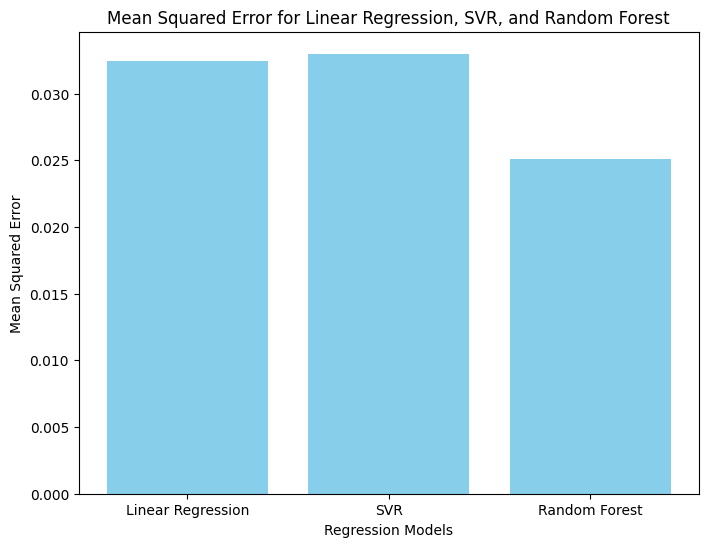

In [51]:
# Define model names and their corresponding mean squared errors
models = ['Linear Regression', 'SVR', 'Random Forest']
mse_values = [mse, mse_svr, mse_rf]  # Assuming these variables are defined from your previous code

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error for Linear Regression, SVR, and Random Forest')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.show()